<a href="https://colab.research.google.com/github/kotiksrex/course_projects/blob/Classification/Iris_PCA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Это учебный проект.


Задача: получить навык применения понижения размерности признакового пространства ) с помощью метода главных компонент (PCA -principal component analysis.

1. **Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.**




In [99]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [102]:
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [103]:
X = pd.read_csv('Iris.csv', sep=',')
X.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [104]:
X.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [105]:
X.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


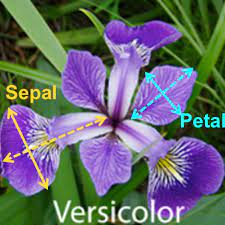

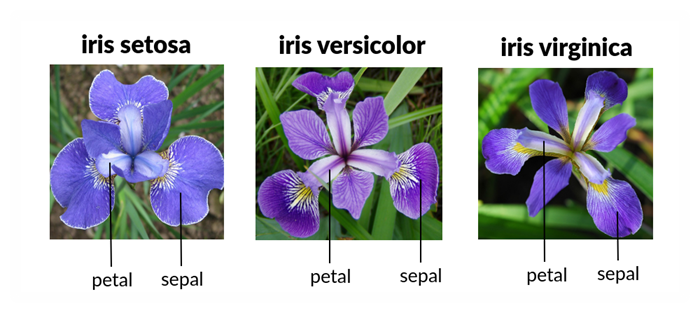

In [106]:
X.pop('Id') 

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [107]:
X.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

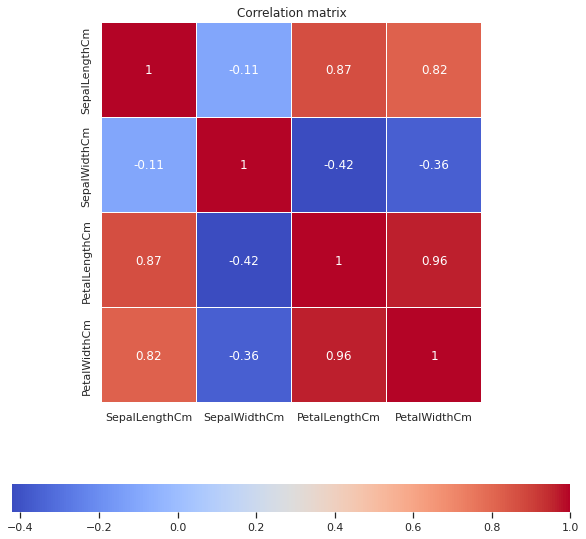

In [108]:
corrmatrix = X.corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)

sns.heatmap(corrmatrix, annot=True, linewidths=.5, cmap='coolwarm', square=True, cbar_kws= {'orientation': 'horizontal'})

plt.title('Correlation matrix')
plt.show()

Sepal - чашелистик

Petal - лепесток

Длина и ширина лепестка - сильная положительная корреляция (0.96)

Длины лепестка и чашелистика - сильная положительная корреляция (0.87)

Ширина лепестка и длина чашелистика  - сильная положительная корреляция (0.82)

 Можно попробовать с помощью этих трех пар сгенерировать новые 3 признака с помощью РСА.

In [109]:
x = X.iloc[:,:-1].values #выбирает каждую строку и столбец, обрезав при этом последний столбец.
# Теперь выделим нужный столбец
y = X['Species']

In [110]:
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Разделим на тренировочные и тестовые наборы, используя функцию train_test_split():

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

In [112]:
scale = StandardScaler()

In [113]:
scale.fit(x_train)
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [114]:
#print(x_train)
print(y_train)

123     Iris-virginica
40         Iris-setosa
111     Iris-virginica
97     Iris-versicolor
86     Iris-versicolor
            ...       
37         Iris-setosa
56     Iris-versicolor
31         Iris-setosa
72     Iris-versicolor
19         Iris-setosa
Name: Species, Length: 120, dtype: object


Реализуем несколько разных моделей для классификации из библиотеки sklearn
1. Support Vector Machines - метод опорных векторов
2. k Nearest Neighbor  - к ближайших соседей
3. LogisticRegression - логистическая регрессия
4. DecisionTreeClassifier - дерево решений
5. naive_bayes  GaussianNB - Наивный байесовский классификатор

In [115]:
SVC_model = SVC()
# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть
# классификатор, чтобы определить, к какому классу принадлежит новая точка
KNN_model = KNeighborsClassifier(n_neighbors=10)
logreg_model = LogisticRegression(random_state = 0)
DTC_model = DecisionTreeClassifier()
NBC_model = GaussianNB()

In [116]:
SVC_model.fit(x_train, y_train)
KNN_model.fit(x_train, y_train)
logreg_model.fit(x_train, y_train)
DTC_model.fit(x_train, y_train)
NBC_model.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [117]:
cv_dict = {0:'SVC_model', 1:'KNN_model', 2:'logreg_model', 3:'DTC_model', 4:'NBC_model'}
cv_models = [SVC_model, KNN_model, logreg_model, DTC_model, NBC_model]

for i, model in enumerate(cv_models):
    print("{}:{}".format(cv_dict[i], classification_report( y_test, model.predict(x_test), target_names=['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])))

SVC_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91        11
Iris-versicolor       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

KNN_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.92      1.00      0.96        11
Iris-versicolor       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

logreg_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91  

**Метод PCA для понижения размерности и создания новых признаков**

In [118]:
# Для начала отмасштабируем выборку
x = x.astype(float)

x = scale.transform(x)

In [119]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = x.T @ x

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(439.5567670379125, array([ 0.54071788, -0.23538599,  0.58063432,  0.56132111]))
(126.73188902559947, array([-0.3767962 , -0.9256166 ,  0.00886166, -0.03435131]))
(22.412281485045057, array([-0.70739368,  0.26574163,  0.15018818,  0.63751006]))
(3.0954886525911753, array([ 0.25542705, -0.1311821 , -0.80014297,  0.52661135]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [120]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[74.27499518026993, 21.414777686157237, 3.7871606675480756, 0.5230664660247605]
Кумулятивная доля дисперсии по компонентам 
[ 74.27499518  95.68977287  99.47693353 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброшена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [121]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.54071788 -0.3767962 ]
 [-0.23538599 -0.9256166 ]
 [ 0.58063432  0.00886166]
 [ 0.56132111 -0.03435131]]


In [122]:
# Сформируем новую матрицу "объекты-признаки"
Z = x.dot(W)

In [123]:
Z[:10]

array([[-2.13630272, -0.53794762],
       [-2.01251438,  0.56977271],
       [-2.28284704,  0.25704194],
       [-2.23227863,  0.50763582],
       [-2.25495611, -0.69406098],
       [-1.89559784, -1.4970239 ],
       [-2.34667847, -0.10590768],
       [-2.1187602 , -0.28785778],
       [-2.29627122,  1.00630337],
       [-2.10445461,  0.3719179 ]])

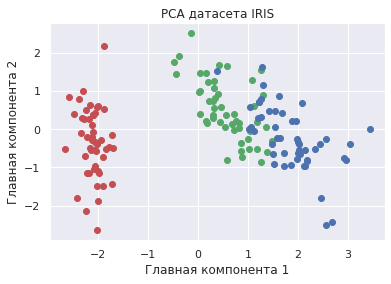

In [124]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

In [125]:
z_train, z_test, y_train, y_test = train_test_split(Z, y, test_size=0.20, random_state=27)

In [126]:
SVC_model.fit(z_train, y_train)
KNN_model.fit(z_train, y_train)
logreg_model.fit(z_train, y_train)
DTC_model.fit(z_train, y_train)
NBC_model.fit(z_train, y_train)


GaussianNB()

In [127]:
cv_dict = {0:'SVC_model', 1:'KNN_model', 2:'logreg_model', 3:'DTC_model', 4:'NBC_model'}
cv_models = [SVC_model, KNN_model, logreg_model, DTC_model, NBC_model]

for i, model in enumerate(cv_models):
    print("{}:{}".format(cv_dict[i], classification_report( y_test, model.predict(z_test), target_names=['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])))

#report = classification_report(y_test, lr.predict(X_test), target_names=['Non-churned', 'Churned'])
#print(report)

SVC_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91        11
Iris-versicolor       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

KNN_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91        11
Iris-versicolor       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

logreg_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91  

**Реализация РСА на 2 компоненты с помощью готовой функции sklearn.**


In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [129]:
x = X.iloc[:,:-1].values #выбирает каждую строку и столбец, обрезав при этом последний столбец.
# Теперь выделим нужный столбец
y = X['Species']

In [130]:
f_train, f_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

In [131]:
scale.fit(f_train)
f_train_scaled = scale.transform(f_train)
f_test_scaled = scale.transform(f_test)

In [132]:
# подгоняем модель PCA на наборе данных 
principalComponents = pca.fit(f_train_scaled)
# преобразуем данные к первым двум главным компонентам
f_train_pca = pca.transform(f_train_scaled)
f_test_pca = pca.transform(f_test_scaled)

In [133]:
principalDf_train = pd.DataFrame(data = f_train_pca , columns = ['principal component 1','principal component 2'])
principalDf_test = pd.DataFrame(data = f_test_pca , columns = ['principal component 1', 'principal component 2'])

In [134]:
principalDf_train.head(4)

,principal component 1,principal component 2
0,1.434441,-0.395984
1,-2.185602,0.381667
2,1.703790,-0.331461
3,0.680558,-0.100555


In [135]:
principalDf_test.head(4)

,principal component 1,principal component 2
0,1.573846,0.313800
1,-1.937777,0.612562
2,1.887571,-0.105728
3,2.537523,2.560038


In [136]:
SVC_model.fit(principalDf_train, y_train)
KNN_model.fit(principalDf_train, y_train)
logreg_model.fit(principalDf_train, y_train)
DTC_model.fit(principalDf_train, y_train)
NBC_model.fit(principalDf_train, y_train)

GaussianNB()

In [137]:
cv_dict = {0:'SVC_model', 1:'KNN_model', 2:'logreg_model', 3:'DTC_model', 4:'NBC_model'}
cv_models = [SVC_model, KNN_model, logreg_model, DTC_model, NBC_model]

for i, model in enumerate(cv_models):
    print("{}:{}".format(cv_dict[i], classification_report( y_test, model.predict(principalDf_test), target_names=['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])))

SVC_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91        11
Iris-versicolor       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

KNN_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91        11
Iris-versicolor       0.92      0.92      0.92        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30

logreg_model:                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00         7
    Iris-setosa       0.91      0.91      0.91  

**Iris-virginica** - самый легко классифицируемый вид из 3-х изучаемых. Метрики Precision и Recall достигают максимума (1).
для **Iris versicilor** лучшее значение Pricision и Recaal составило 0,93. т.е. модель с вероятностью 93% найдет этот класс и в 93% случаев определит его правильно.
**Iris setosa** - наиболее трудно определяемый класс (вид ириса) 91% нахождения и 91% правильной классификации.
Дерево решений чуть хуже справляется с классификацией 2-х близких по морфологии видов ирисов **Iris versicilor** и **Iris setosa**.


2. **Метод SVD для понижения размерности и создания новых признаков** 


 *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [138]:
# Найдем собственные векторы и собственные значения
covariance_matrix = x.T @ x

U, S, Vh = np.linalg.svd(covariance_matrix)
# S -список сингулярных чисел в виде вектора 

In [139]:
U

array([[-0.75116805, -0.28583096,  0.49942378,  0.32345496],
       [-0.37978837, -0.54488976, -0.67502499, -0.32124324],
       [-0.51315094,  0.70889874, -0.05471983, -0.48077482],
       [-0.16787934,  0.34475845, -0.54029889,  0.74902286]])

In [140]:
S

array([9.20653060e+03, 3.14103073e+02, 1.20360193e+01, 3.53031167e+00])

In [141]:
Vh

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [-0.28583096, -0.54488976,  0.70889874,  0.34475845],
       [ 0.49942378, -0.67502499, -0.05471983, -0.54029889],
       [ 0.32345496, -0.32124324, -0.48077482,  0.74902286]])

In [142]:
# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(S[i]), U[:, i]) for i in range(len(S))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(9206.530596067098, array([-0.75116805, -0.37978837, -0.51315094, -0.16787934]))
(314.10307292077425, array([-0.28583096, -0.54488976,  0.70889874,  0.34475845]))
(12.03601934571417, array([ 0.49942378, -0.67502499, -0.05471983, -0.54029889]))
(3.5303116664118246, array([ 0.32345496, -0.32124324, -0.48077482,  0.74902286]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [143]:
eig_sum = sum(S)
var_exp = [(i / eig_sum) * 100 for i in sorted(S, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[96.54296885622259, 3.293797035724652, 0.12621399871766711, 0.037020109335079224]
Кумулятивная доля дисперсии по компонентам 
[ 96.54296886  99.83676589  99.96297989 100.        ]


In [144]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.75116805 -0.28583096]
 [-0.37978837 -0.54488976]
 [-0.51315094  0.70889874]
 [-0.16787934  0.34475845]]


In [145]:
# Сформируем новую матрицу "объекты-признаки"
Z = x.dot(W)

In [146]:
Z[:10]

array([[-5.91220352, -2.30344211],
       [-5.57207573, -1.97383104],
       [-5.4464847 , -2.09653267],
       [-5.43601924, -1.87168085],
       [-5.87506555, -2.32934799],
       [-6.47699043, -2.32552598],
       [-5.51542859, -2.07156181],
       [-5.85042297, -2.14948016],
       [-5.15851287, -1.77642658],
       [-5.64458172, -1.99190598]])

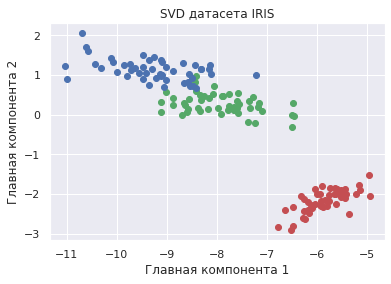

In [147]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('SVD датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report